In [4]:
import pandas as pd
import numpy as np
import re
from sentence_transformers import SentenceTransformer
from translate import Translator
from setfit import SetFitClassifier
# from setfit import SetFitModel, SetFitTrainer
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("orbitshift_classification.csv")
df.head()

,Unnamed: 0,title,label,processed_title
0,0,"Director, Learning and Support",CLASS1,director learning and support
1,1,Customer Service Assistant,CLASS2,customer service assistant
2,2,2023 Internship and Education Program Manageme...,CLASS13,intern and education program management intern
3,3,Communications Technician,CLASS13,communications technician
4,4,Emergency Preparedness Officer,CLASS3,emergency prepresentativearedness officer


In [6]:
df.drop(['Unnamed: 0', 'title'], axis=1)

,label,processed_title
0,CLASS1,director learning and support
1,CLASS2,customer service assistant
2,CLASS13,intern and education program management intern
3,CLASS13,communications technician
4,CLASS3,emergency prepresentativearedness officer
...,...,...
2254,CLASS8,team lead quality assucance
2255,CLASS8,associate director gra qms quality
2256,CLASS4,continuous improvement champion 2
2257,CLASS13,manager global evidence and outcomes china sha...


In [7]:
df['label'].unique()

array(['CLASS1', 'CLASS2', 'CLASS13', 'CLASS3', 'CLASS4', 'CLASS5',
       'CLASS6', 'CLASS7', 'CLASS8', 'CLASS9', 'CLASS10', 'CLASS11',
       'CLASS12'], dtype=object)

In [8]:
class_map = {'CLASS1':1, 'CLASS2':2, 'CLASS13':13, 'CLASS3':3, 'CLASS4':4, 'CLASS5':5,
       'CLASS6':6, 'CLASS7':7, 'CLASS8':8, 'CLASS9':9, 'CLASS10':10, 'CLASS11':11,
       'CLASS12':12}
df['label'] = df['label'].map(class_map)

In [9]:
X = df['processed_title']
y_true = df['label']

In [10]:
X[0]

'director learning and support'

In [11]:
y_true[0]

1

In [12]:
from sklearn.model_selection import train_test_split
#Train/Test
x_train, X_test, y_train, y_test = train_test_split(X, y_true, stratify=y_true, test_size=0.2)
#Train/CV
X_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2)

In [13]:
print('Number of data points in TRAIN data:', X_train.shape[0])
print('Number of data points in TEST data:', X_test.shape[0])
print('Number of data points in CROSS-VALIDATION data:', x_cv.shape[0])

Number of data points in TRAIN data: 1445
Number of data points in TEST data: 452
Number of data points in CROSS-VALIDATION data: 362


In [14]:
clf = SetFitClassifier('sentence-transformers/all-MiniLM-L6-v2')

In [15]:
title = X_train.to_list()
label = y_train.to_list()

In [16]:
clf.fit(title,label)

2023-05-07 20:28:49.622265: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 20:28:50.769474: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Iteration:   5%|█████▌                                                                                                                  | 42/904 [01:02<23:58,  1.67s/it]


Iteration:  10%|███████████▊                                                                                                            | 89/904 [02:14<18:00,  1.33s/it]


Iteration:  15%|█████████████████▉                                                                                                     | 136/904 [03:02<13:51,  1.08s/it]


Iteration:  20%|████████████████████████                                                                                               | 183/904 [03:51<12:34,  1.05s/it]


Iteration:  25%|██████████████████████████████▎                                                                                        | 230/904 [05:23<22:01,  1.96s/it]


Iteration:  31%|████████████████████████████████████▍                                                                                  | 277/904 [06:20<12:26,  1.19s/it]


Iteration:  36%|██████████████████████████████████████████▋                                                                            | 324/904 [07:16<12:04,  1.25s/it]


Iteration:  41%|████████████████████████████████████████████████▊                                                                      | 371/904 [08:05<09:02,  1.02s/it]


Iteration:  46%|███████████████████████████████████████████████████████                                                                | 418/904 [09:01<10:18,  1.27s/it]


Iteration:  51%|█████████████████████████████████████████████████████████████▏                                                         | 465/904 [09:46<06:54,  1.06it/s]


Iteration:  57%|███████████████████████████████████████████████████████████████████▍                                                   | 512/904 [10:41<07:26,  1.14s/it]


Iteration:  62%|█████████████████████████████████████████████████████████████████████████▌                                             | 559/904 [11:37<06:28,  1.13s/it]


Iteration:  67%|███████████████████████████████████████████████████████████████████████████████▊                                       | 606/904 [12:52<07:56,  1.60s/it]


Iteration:  72%|█████████████████████████████████████████████████████████████████████████████████████▉                                 | 653/904 [14:21<07:45,  1.86s/it]


Iteration:  77%|████████████████████████████████████████████████████████████████████████████████████████████▏                          | 700/904 [16:04<07:14,  2.13s/it]


Iteration:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 747/904 [17:31<05:12,  1.99s/it]


Iteration:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 794/904 [18:53<03:05,  1.69s/it]


Iteration:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 841/904 [20:06<01:35,  1.51s/it]


Iteration:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 888/904 [21:46<00:30,  1.88s/it]


Epoch: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [22:04<00:00, 1324.41s/it]


In [17]:
title_test = X_test.to_list()
label_test = y_test.to_list()

In [18]:
title_cv = x_cv.to_list()
label_cv = y_cv.to_list()

In [19]:
label_cv_pred = clf.predict(title_cv)

In [20]:
label_test_pred = clf.predict(title_test)

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

## Accuracy score of cv data

In [22]:
accuracy_score(label_cv, label_cv_pred)

0.5580110497237569

## Accuracy score of test data

In [23]:
accuracy_score(label_test, label_test_pred)

0.5663716814159292

## Confusion Matrix for CV Data

In [24]:
cm_cv = confusion_matrix(label_cv, label_cv_pred)

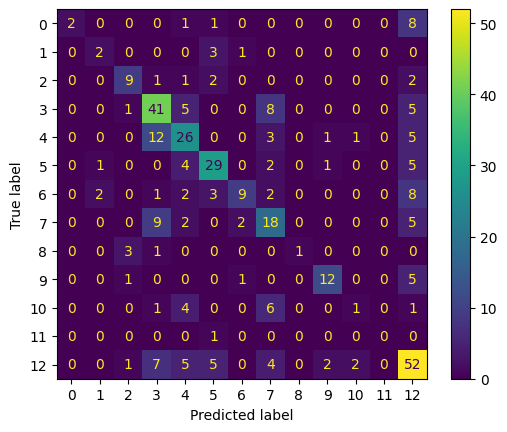

In [25]:
disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm_cv)
disp_cv.plot()

## Confusion Matrix for Test Data

In [26]:
cm_test = confusion_matrix(label_test, label_test_pred)

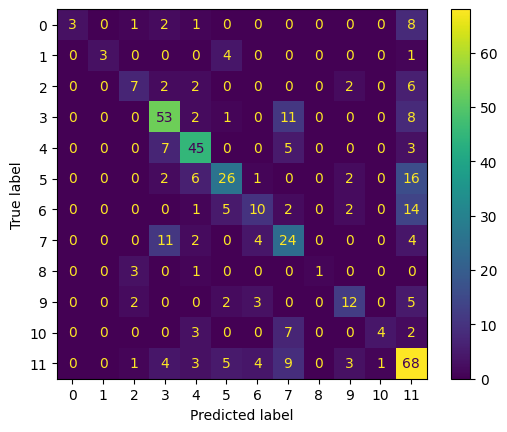

In [27]:
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()

## F1 Score, Presicion, Recall for Test Data

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
f1_score = f1_score(label_test, label_test_pred, average='weighted')
print('F1 Score_test :', f1_score)
recall_score = recall_score(label_test, label_test_pred, average='weighted')
print('Recall_test :', recall_score)
precision_score = precision_score(label_test, label_test_pred, average='weighted')
print('Precision_test :', precision_score)

F1 Score_test : 0.5549305520035933
Recall_test : 0.5663716814159292
Precision_test : 0.5961994699071649


## F1 Score, Presicion, Recall for CV Data

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
f1_score = f1_score(label_cv, label_cv_pred, average='weighted')
print('F1 Score_cv :', f1_score)
recall_score = recall_score(label_cv, label_cv_pred, average='weighted')
print('Recall_cv:', recall_score)
precision_score = precision_score(label_cv, label_cv_pred, average='weighted')
print('Precision_cv :', precision_score)

F1 Score_cv : 0.5436415546135459
Recall_cv: 0.5580110497237569
Precision_cv : 0.5752832139584879


In [30]:
clf.save('/home/dell/Documents/Sentence Transformers/saved_model')

In [31]:
load_model = SetFitClassifier.load('/home/dell/Documents/Sentence Transformers/saved_model')

In [36]:
job_title = 'data analyst'
df = pd.DataFrame()
df['job_title'] = ['customer service assistant']
job_title = df['job_title'].to_list()
prediction = load_model.predict(job_title)
prediction[0]


2

clf.save('/home/dell/Downloads/orbitshift_clf.h5')